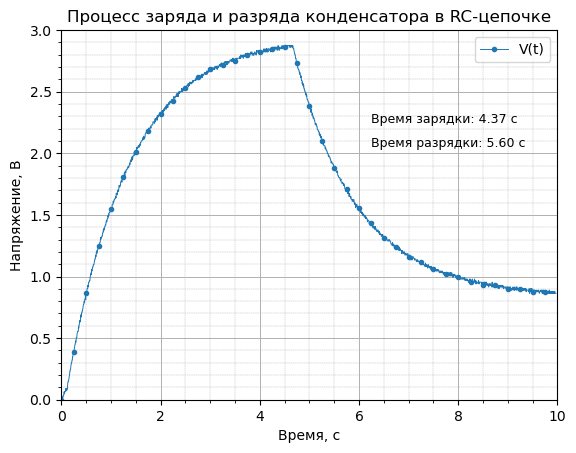

<Figure size 640x480 with 0 Axes>

In [115]:
from matplotlib import pyplot as plt
import numpy as np
from textwrap import wrap
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math

x_majortick = 2
x_minortick = 0.5
y_majortick = 0.5
y_minortick = 0.1


fig, ax = plt.subplots()

data = np.loadtxt("data.txt", dtype="int")
voltage = [(float(x)*3.3)/256 for x in data]

t_period, v_step = np.loadtxt("settings.txt", dtype="float")

step = np.arange(len(voltage))
time = [t_period*x for x in step]

plt.title('\n'.join(wrap("Процесс заряда и разряда конденсатора в RC-цепочке")), loc="center")
plt.xlabel("Время, c")
plt.ylabel("Напряжение, В")

charge_time = time[np.argmax(voltage)]
uncharge_time = np.amax(time) - charge_time
plt.text(6.25, 2.25, 'Время зарядки: {:.2f} с'.format(charge_time), fontsize=9)
plt.text(6.25, 2.05, 'Время разрядки: {:.2f} с'.format(uncharge_time), fontsize=9)


plt.xlim([0, x_majortick*math.ceil(float(np.amax(time))/x_majortick)])
plt.ylim([0, y_majortick*math.ceil(float(np.amax(voltage))/y_majortick)])

ax.xaxis.set_major_locator(MultipleLocator(x_majortick))
ax.xaxis.set_minor_locator(MultipleLocator(x_minortick))
ax.yaxis.set_major_locator(MultipleLocator(y_majortick))
ax.yaxis.set_minor_locator(MultipleLocator(y_minortick))

ax.plot(time, voltage, linewidth = '0.7', label="V(t)", marker='.', markevery=50)
plt.legend()
plt.grid(linewidth=0.7, which='both', linestyle="-")
plt.grid(linewidth=0.3, which='minor', linestyle="--")

plt.show()
plt.savefig("figure.svg")